# Ujian Tengah Semester Aljabar Linear Terapan II (2019/20)
Selasa, 7 April 2020 10.00.00 WIB sampai 17.59.59 WIB

**Nama      : Hanif Maulana Abdullah**\
NIM      : 17/409497/PA/17804\
No Ujian : 9

**<p style='text-align: justify;'>1. [ (CO2) Students have ability to apply linear algebra to dynamical systems and
data analysis (concepts, advantages, applications and computation of Eigenvalues
and Singular Values). Points. 30]</p>**
<p style='text-align: justify;'>
You will given a set of sample of signal that we want to examine. You may
download the data at the following link (Github:sinyal.csv). You were asked
to cleaned up the data. You mau use digital filter up to your choice to try to
cleaned up the data.

(a) What filter will you use to process the data? Explain why you choose this
filter.

(b) Based on the data that you have cleaned up, give an estimated guess for
the frequency of the sample of the data.
</p>

**Jawab**

Inisialisasi *package* dalam *python* yang dibutuhkan dalam *coding*

In [1]:
import numpy as np #untuk mengambil rumus2 seperti: cos, pi, linspace
import pandas as pd #salah satunya untuk membaca file
import matplotlib.pyplot as plt #untuk membuat grafik

Membaca file "sinyal.xlsx" dengan *package pandas*

In [2]:
#membaca file dengan pandas sambil memisahkan time dan sample masing2 sebagai array
sinyal = pd.read_excel("sinyal.xlsx", sheet_name='sinyal')
sinyal = sinyal.to_numpy()
time = np.array(sinyal[0:-1,0:1])
#array time berisi data yang dibaca dari file sinyal.xslx
#mulai kolom 2 sampai kolom 4002 pada baris ke-1(4000 data)
time = time.astype(float) #dipilih tipe float
sample = sinyal[0:-1,1:2]
#array sample berisi data yang dibaca dari file sinyal.xslx
#mulai kolom 2 sampai kolom 4002 pada baris ke-2(4000 data)
sample = sample.astype(float) #dipilih tipe float

Print Grafik (Time, Sample)

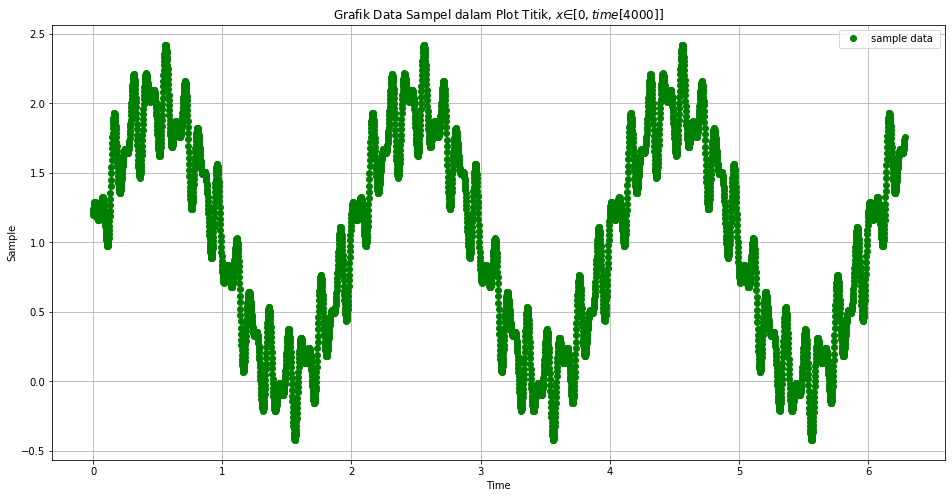

In [3]:
#Print grafik (time,sample) dalam bentuk plot titik
#Sample yang dimaksud adalah sampel sinyal yang berhasil diterima
plt.figure(figsize=(16,8))
plt.plot(time,sample,'go', label="sample data ")
plt.legend(loc='best')
plt.title("Grafik Data Sampel dalam Plot Titik, $x∈[0,time[4000]]$")
plt.xlabel('Time')
plt.ylabel('Sample')
plt.grid()
plt.show()

<p style='text-align: justify;'>
Didefinisikan fungsi $g$ dengan

<p style='text-align: center;'>$g(t)=sin(\pi t)+1$<p>

dengan t dalam satuan waktu dan f dalam satuan sinyal. Kemudian print grafik $(t, g(t))$.

**Klaim**\
Fungsi $g$ merupakan solusi (data eksak) dari data yang diberikan dalam file "sinyal.xlsx". Hal ini dilakukan untuk mempermudah pencarian filter yang sesuai.

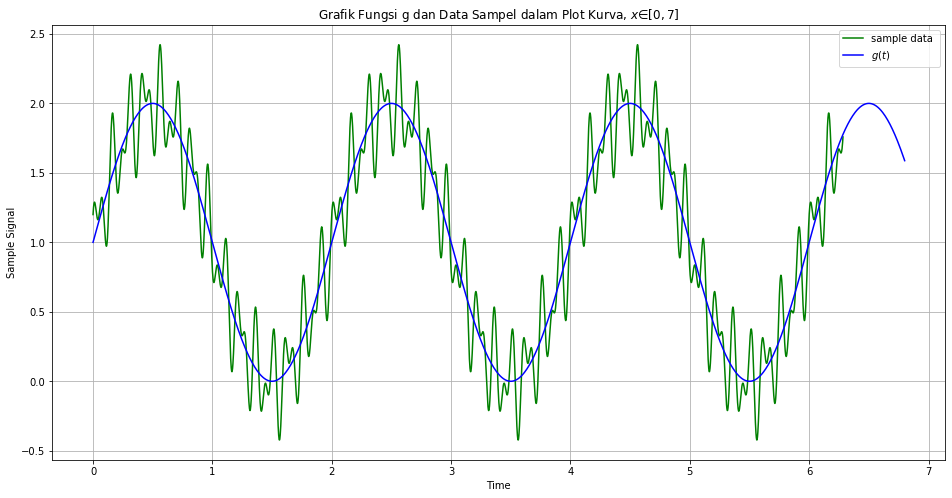

In [4]:
#Mendefinisikan fungsi g
def g(t):
    y = np.sin(np.pi*t)+1
    return(y)

t = np.linspace(0,6.8,1000)
#Membagi t menjadi 1000 bagian

plt.figure(figsize=(16,8)) #ukuran grafik
plt.plot(time,sample,'g', label="sample data ")
#grafik (time,sample) dalam bentuk plot kurva (hijau)
plt.plot(t,g(t),label="$g(t)$",color='b')
#grafik fungsi f terhadap t (biru)
#Legenda (untuk memperindah tampilan)
plt.legend(loc='best')
plt.title("Grafik Fungsi g dan Data Sampel dalam Plot Kurva, $x∈[0,7]$")
plt.xlabel('Time')
plt.ylabel('Sample Signal')
plt.grid()
plt.show()

<p style='text-align: justify;'>
Selanjutnya akan dicari filter yang sesuai untuk melakukan "cleanup data" atau membersihkan data. Hal ini sama saja mencari solusi pendekatan dari data yang diberikan sehingga dapat ditemukan suatu fungsi yang merupakan representasi sinyal asli yang telah dikirimkan. Dipilih filter smoothing yaitu

<p style='text-align: center;'> $y_k = \frac 14 x_k + \frac 12 x_k$$_-$$_1$$ + \frac 14 x_k$$_-$$_2$.<p>

<p style='text-align: justify;'>
Diperhatikan bahwa pemilihan filter smoothing biasa menyebabkan data yang telah diberi filter smoothing tidak jauh berbeda dengan data sampel (seperti pada grafik berikut). Akibatnya, harus dilakukan modifikasi terhadap filter smoothing. Dilakukan modifikasi dengan memperbesar jarak pengambilan titik $[k], [k-m], dan [k-2m]$. Dalam hal ini, dipilih $m=30$ (pemilihan dilakukan setelah dicoba dengan mengubah-ubah nilai m). Sehingga diperoleh hasil modifikasi filter smoothing, namakan "Filter Smoothing 30" yaitu

<p style='text-align: center;'>$z_k = \frac 14 x_k + \frac 12 x_k$$_-$$_3$$_0$$ + \frac 14 x_k$$_-$$_6$$_0$.<p>

Selanjutnya hasil smoothing digambarkan dalam grafik berikut:

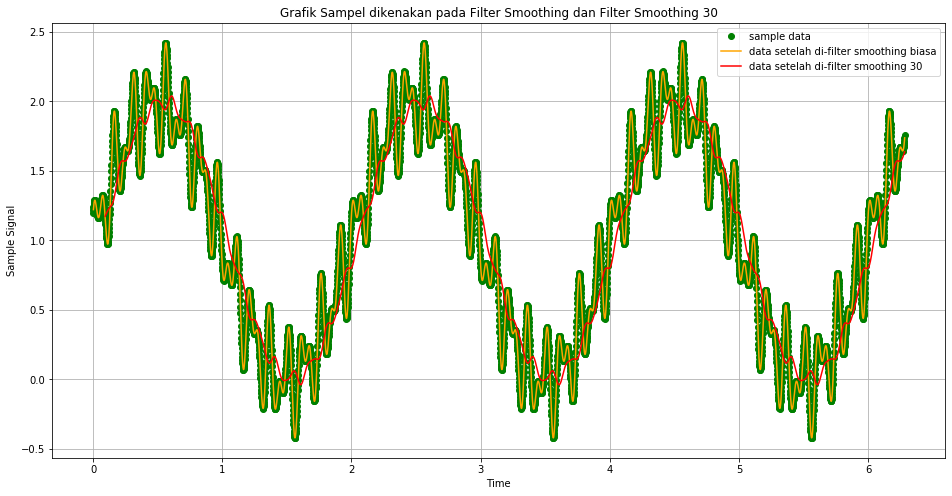

In [5]:
#Diberikan persamaan filter smoothing biasa
yk = np.array([sample[k]/4 + sample[k-1]/2 + sample[k-2]/4 for k in range(2,4000)])
#Diberikan persamaan filter smoothing 30
zk = np.array([sample[k]/4 + sample[k-30]/2 + sample[k-60]/4 for k in range(60,4000)])

plt.figure(figsize=(16,8))
plt.plot(time,sample,'go', label="sample data ") #titik-titik hijau
plt.plot(time[2:4000],yk,'orange', label="data setelah di-filter smoothing biasa") #orange
plt.plot(time[60:4000],zk,'r', label="data setelah di-filter smoothing 30") #merah

plt.title("Grafik Sampel dikenakan pada Filter Smoothing dan Filter Smoothing 30")
plt.xlabel('Time')
plt.ylabel('Sample Signal')
plt.legend(loc='best')
plt.grid()
plt.show()

<p style='text-align: justify;'>
Lebih lanjut, dapat digambarkan Grafik Sampel dikenakan pada Filter Smoothing 30, dan Data Sampel, dan Fungsi $g$ (Data Eksak) dalam Plot Kurva sebagai berikut:

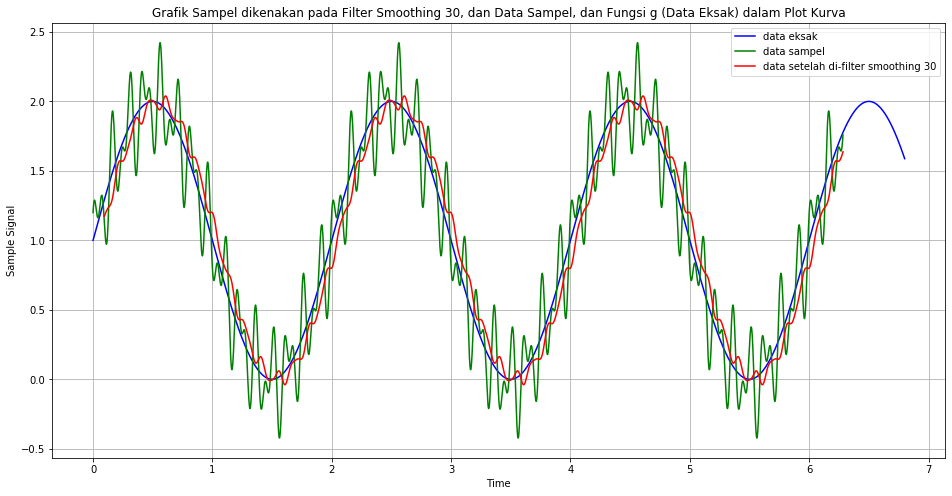

In [6]:
#Diberikan persamaan filter smoothing biasa
yk = np.array([sample[k]/4 + sample[k-1]/2 + sample[k-2]/4 for k in range(2,4000)])
#Diberikan persamaan filter smoothing 30
zk = np.array([sample[k]/4 + sample[k-30]/2 + sample[k-60]/4 for k in range(60,4000)])

plt.figure(figsize=(16,8))
plt.plot(t,g(t),label="data eksak",color='b') #biru
plt.plot(time,sample,'g', label="data sampel") #kurva hijau
plt.plot(time[60:4000],zk,'r', label="data setelah di-filter smoothing 30") #merah

plt.title("Grafik Sampel dikenakan pada Filter Smoothing 30, dan Data Sampel, dan Fungsi g (Data Eksak) dalam Plot Kurva")
plt.xlabel('Time')
plt.ylabel('Sample Signal')
plt.legend(loc='best')
plt.grid()
plt.show()

<p style='text-align: justify;'>
Cukup jelas bahwa, setelah data dikenakan pada Filter Smoothing 30 diperoleh fungsi $z_k$ yang mendekati fungsi $g$ (data eksak). Dengan demikian, Filter Smoothing 30 yaitu:

<p style='text-align: center;'>$z_k = \frac 14 x_k + \frac 12 x_k$$_-$$_3$$_0$$ + \frac 14 x_k$$_-$$_6$$_0$.<p>
merupakan filter yang tepat untuk memperoleh sinyal aslinya, yaitu f dengan,

<p style='text-align: center;'>$g(t)=sin(\pi t)+1$.<p>

**Filter Smoothing 30 merupakan jawaban untuk soal 1.a)**
<p style='text-align: justify;'>
Filter Smoothing 30 dipilih dengan memodifikasi Filter Smoothing biasa. Karena data sampel yang dipunyai sangat banyak, maka jarak antar data menjadi sangat kecil. Akibatnya, filter smoothing biasa hanya akan mengeluarkan hasil filter di sekitar data sampel. Dengan demikian, jarak antara titik-titik $[k], [k-m], dan [k-2m]$ dalam filter smoothing harus diperbesar. Dalam hal ini, dipilih $m=30$ (pemilihan dilakukan setelah dicoba dengan mengubah-ubah nilai m). Nilai $m=30$ telah memberikan hasil yang cukup dekat dan lengkap apabila dibandingkan selain $m=30$, $m$ bilangan asli dari 30 sampai 2000.

<p style='text-align: justify;'>
Berdasarkan hasil clean-up data dan dari grafik terakhir, terlihat bahwa grafik fungsi data yang telah di-filter smoothing 30 mendekati grafik data eksaknya. Dipunyai periode dari

<p style='text-align: center;'>$g(t)=sin(\pi t)+1$<p>
<p style='text-align: justify;'>
adalah $T=2 satuan waktu.$ Akibatnya diperoleh frekuensi $f=\frac 1T = \frac 12 satuan frekuensi.$ Karena z_k mendekati g maka dapat dikatakan diperoleh perkiraan periode dari sinyal yang masuk adalah
    
<p style='text-align: center;'>$f=\frac 12 satuan frekuensi.$<p>

**yang merupakan jawaban untuk soal 1.b)**